In [13]:
# Подключение библиотек
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import mglearn
import mglearn.datasets


Text(0, 0.5, 'Целевая переменная')

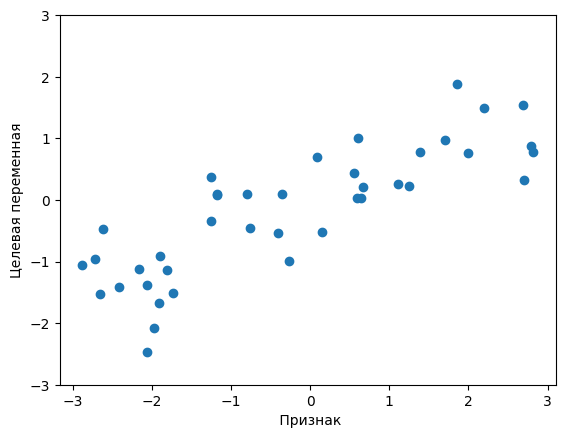

In [2]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel(" Признак")
plt.ylabel("Целевая переменная")

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Ключи cancer(): \n{}".format(cancer.keys()))

Keys of cancer(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [11]:
''''data': Этот ключ содержит данные (признаки) для обучения модели. Каждая строка этого массива представляет собой набор признаков для одного образца.

'target': Этот ключ содержит соответствующие метки классов для каждого образца в данных. В контексте рака молочной железы, это может быть 0 (для злокачественных опухолей) или 1 (для доброкачественных опухолей).

'target_names': Этот ключ содержит имена классов. В данном случае, вероятно, это "злокачественные" и "доброкачественные".

'feature_names': Этот ключ содержит имена признаков (характеристик), которые соответствуют столбцам в 'data'. Например, это могут быть параметры, связанные с размером опухоли, их текстурой и т.д.

'DESCR': Этот ключ содержит описание набора данных, включая его происхождение, количество образцов и признаков, а также их описание.

'frame': Этот ключ, вероятно, содержит информацию о форматировании данных, такие как заголовки столбцов и т.д.

'filename': Этот ключ, вероятно, содержит путь к файлу, из которого были загружены данные.

'data_module': Этот ключ, вероятно, указывает на модуль или библиотеку, из которой были загружены данные.'''

data = cancer['data']
data


array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [12]:
target = cancer['target']
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [15]:
# Создание DataFrame из данных и их отображение
data = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
target = pd.DataFrame(data=cancer.target, columns=['target'])
full_data = pd.concat([data, target], axis=1)
full_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [17]:
print("Форма массива data для набора cancer: {}".format(cancer.data.shape))

Форма массива data для набора cancer: (569, 30)


In [18]:
print("Количество примеров для каждого класса: \n{}".format({n: v for n,v in zip(cancer.target_names,np.bincount
    (cancer.target))}))

Количество примеров для каждого класса: 
{'malignant': 212, 'benign': 357}


In [19]:
print("Имена признаков:\n{}".format(cancer.feature_names))

Имена признаков:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [27]:
# Dataset load_boston
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()
print("Форма массива data для набора california_housing:{}".format(california_housing.data.shape))

Форма массива data для набора california_housing:(20640, 8)


In [26]:
X, y = mglearn.datasets.load_extended_boston()
print("Форма массива X: {}".format(X.shape))

Форма массива X: (506, 104)


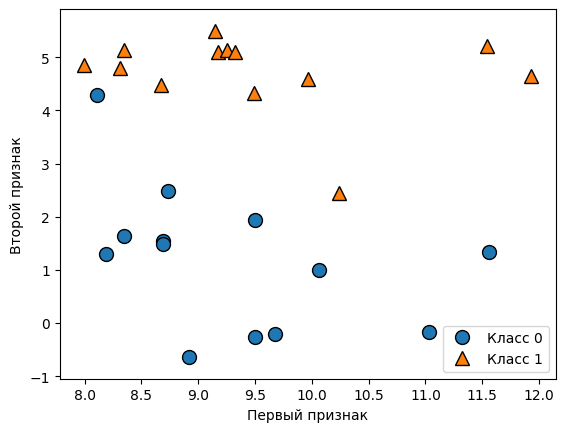

In [28]:
# Генерируем набор данных
X,y = mglearn.datasets.make_forge()

# Строим график для набора данных
%matplotlib inline
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Класс 0", "Класс 1"], loc=4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
plt.show()

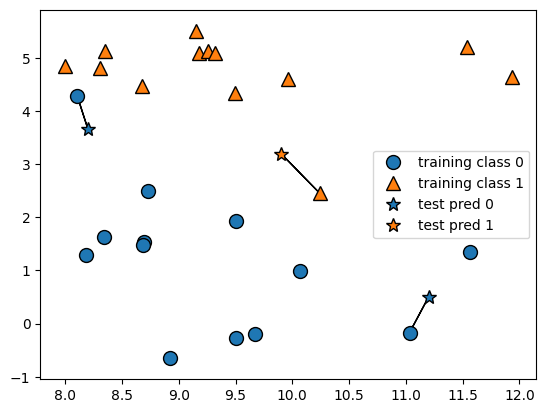

In [31]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

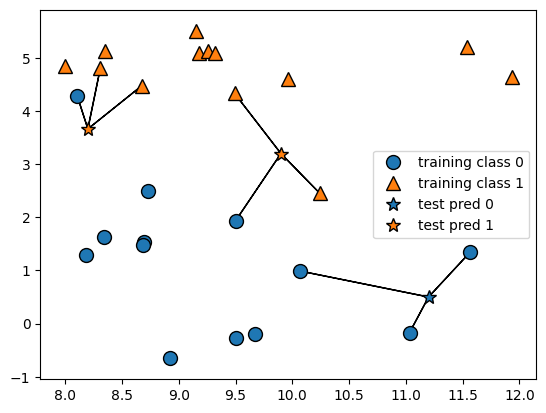

In [33]:
mglearn.plots.plot_knn_classification(n_neighbors=3)


In [34]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


In [35]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [36]:
clf.fit(X_train ,y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
# Оценки модели
print("Прогнозы на тестовом наборе: {}".format(clf.predict(X_test)))

Прогнозы на тестовом наборе: [1 0 1 0 1 0 0]


In [38]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(X_test, y_test)))

Правильность на тестовом наборе: 0.86


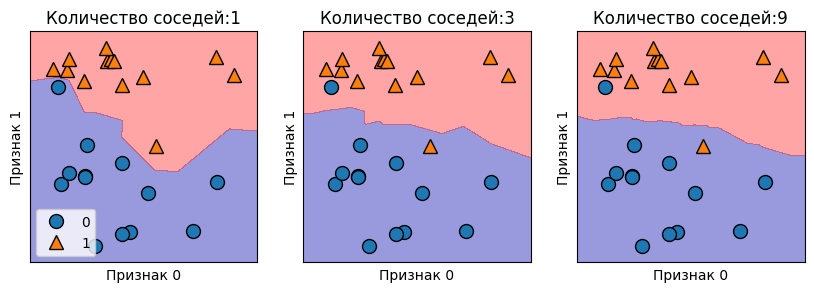

In [40]:
fig, axes = plt.subplots(1,3,figsize=(10, 3))
for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0],X[:,1],y, ax=ax)
    ax.set_title("Количество соседей:{}".format(n_neighbors))
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
axes[0].legend(loc=3)

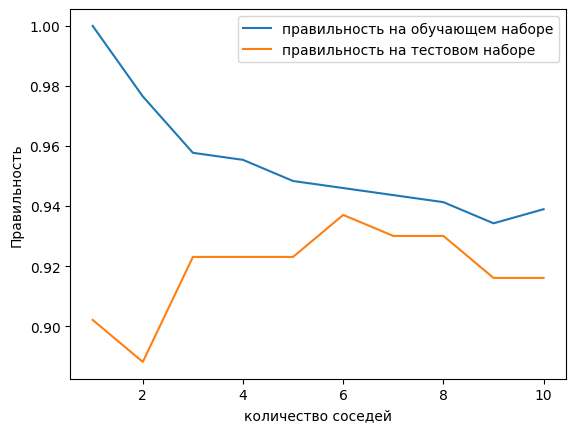

In [41]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
 # строим модель
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # записываем правильность на обучающем наборе
 training_accuracy.append(clf.score(X_train, y_train))
 # записываем правильность на тестовом наборе
 test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
plt.legend()


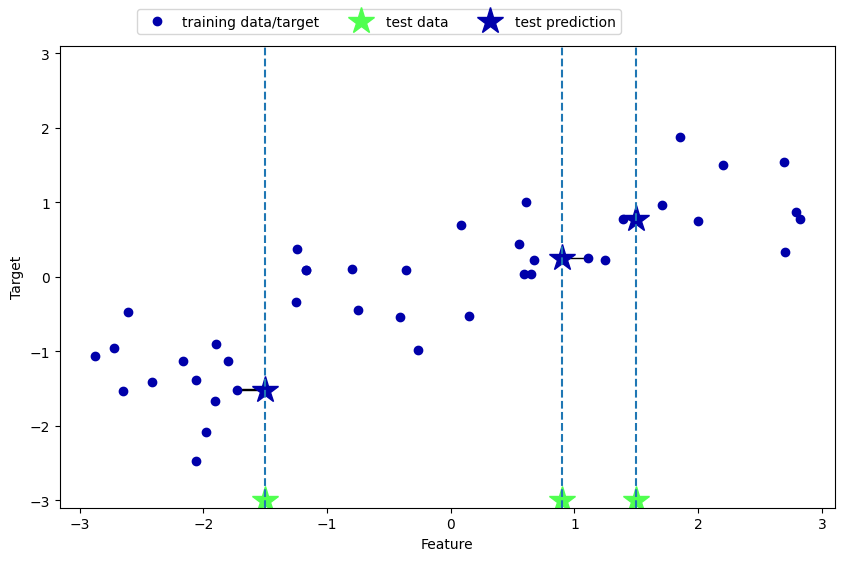

In [42]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

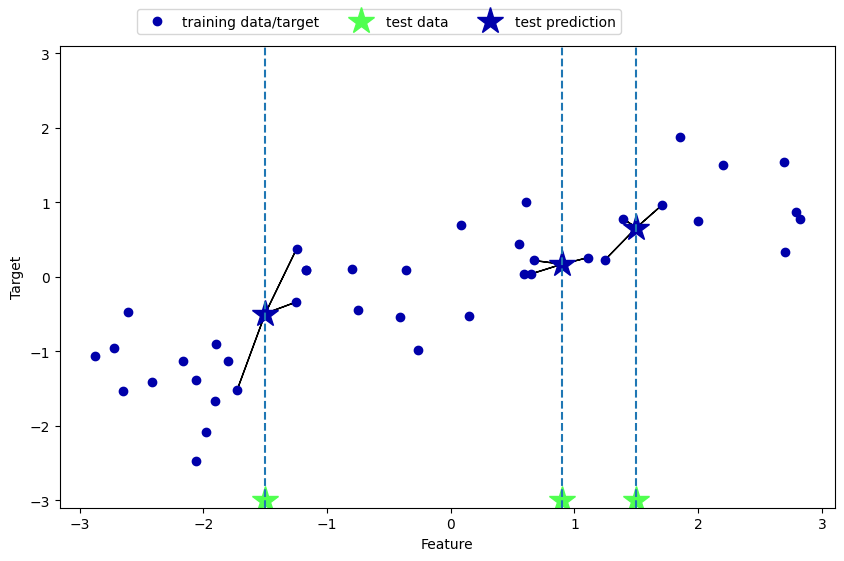

In [43]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [44]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [45]:
print("Прогнозы для тестового набора: \n{}".format(reg.predict(X_test)))

Прогнозы для тестового набора: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [46]:
print("R^2 на тестовом наборе: {:.2f}".format(reg.score(X_test, y_test)))


R^2 на тестовом наборе: 0.83


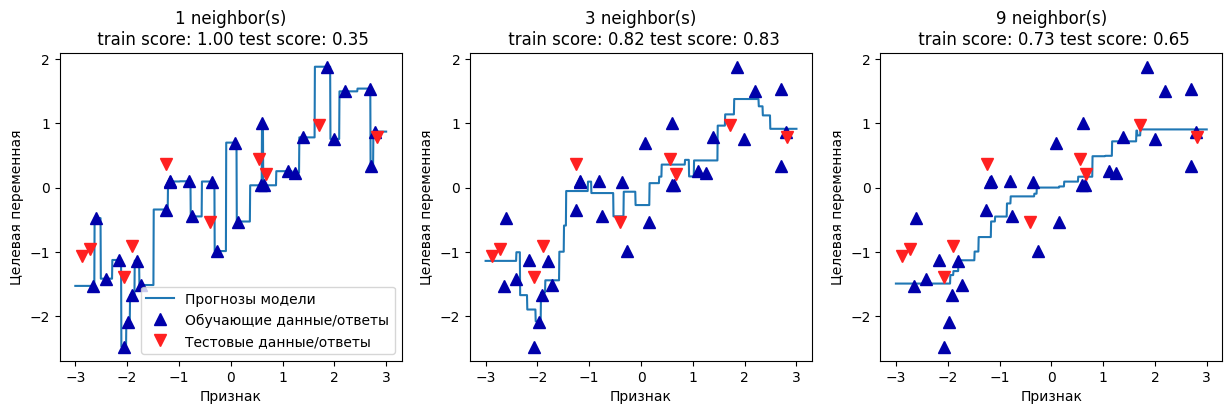

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# создаем 1000 точек данных, равномерно распределенных между -3 и 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
 # получаем прогнозы, используя 1, 3, и 9 соседей
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Признак")
 ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы",
 "Тестовые данные/ответы"], loc="best")


w[0]: 0.393906  b: -0.031804


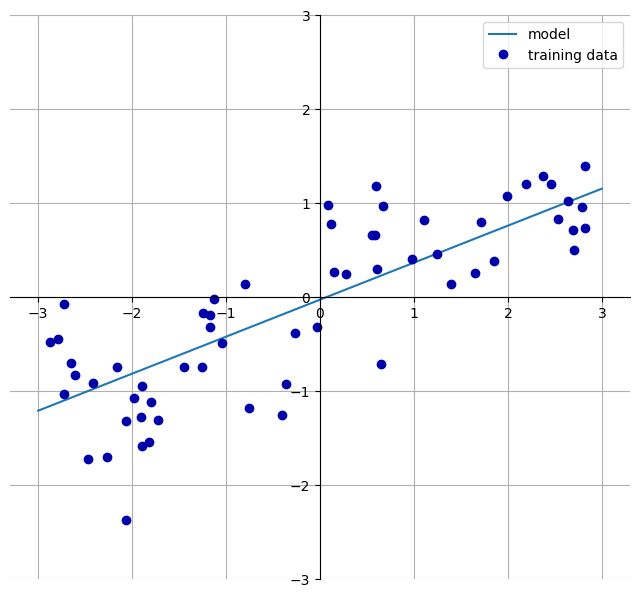

In [48]:
mglearn.plots.plot_linear_regression_wave()

In [49]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [50]:
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_:[0.39390555]
lr.intercept_:-0.031804343026759746


In [51]:
print("правильность на обучающем наборе: {:.2f}".format(lr.score(X_train,y_train)))
print("правильность на тестовом наборе: {:.2f}".format(lr.score(X_test,y_test)))

правильность на обучающем наборе: 0.67
правильность на тестовом наборе: 0.66


In [55]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
lr3 = LinearRegression().fit(X_train, y_train)

In [56]:
print("правильность на обучающем наборе: {:.2f}".format(lr3.score(X_train,y_train)))
print("правильность на тестовом наборе: {:.2f}".format(lr3.score(X_test,y_test)))

правильность на обучающем наборе: 0.95
правильность на тестовом наборе: 0.61


In [57]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
print("правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train,y_train)))
print("правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test,y_test)))

правильность на обучающем наборе: 0.89
правильность на тестовом наборе: 0.75


In [58]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train,y_train)))
print("правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test,y_test)))

правильность на обучающем наборе: 0.79
правильность на тестовом наборе: 0.64


In [59]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("правильность на обучающем наборе: {:.2f}".format(ridge01.score(X_train,y_train)))
print("правильность на тестовом наборе: {:.2f}".format(ridge01.score(X_test,y_test)))

правильность на обучающем наборе: 0.93
правильность на тестовом наборе: 0.77


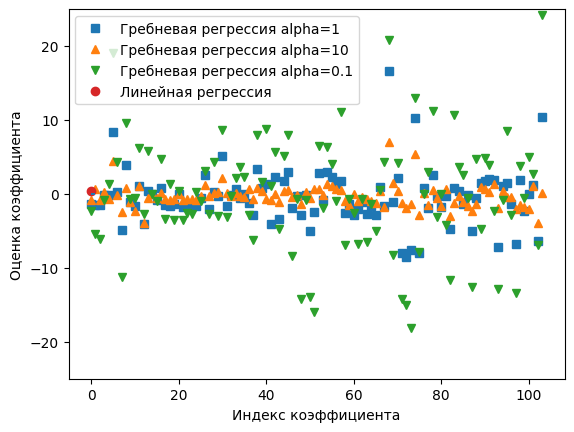

In [60]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()


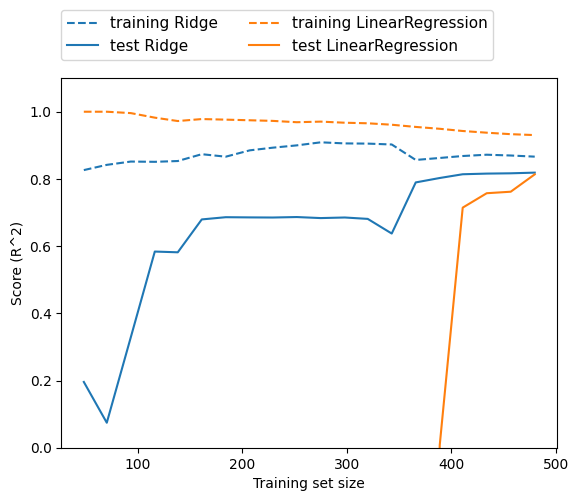

In [61]:
mglearn.plots.plot_ridge_n_samples()

In [63]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train,y_train)))
print("правильность на тестовом наборе: {:.2f}".format(lasso.score(X_test,y_test)))   
print("количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))

правильность на обучающем наборе: 0.29
правильность на тестовом наборе: 0.21
количество использованных признаков: 4


In [65]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train,y_train)))
print("правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test,y_test)))   
print("количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))

правильность на обучающем наборе: 0.90
правильность на тестовом наборе: 0.77
количество использованных признаков: 33


In [66]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("правильность на обучающем наборе: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("правильность на тестовом наборе: {:.2f}".format(lasso00001.score(X_test,y_test)))   
print("количество использованных признаков: {}".format(np.sum(lasso00001.coef_ != 0)))

правильность на обучающем наборе: 0.95
правильность на тестовом наборе: 0.64
количество использованных признаков: 96


Text(0, 0.5, 'Оценка коэффициента')

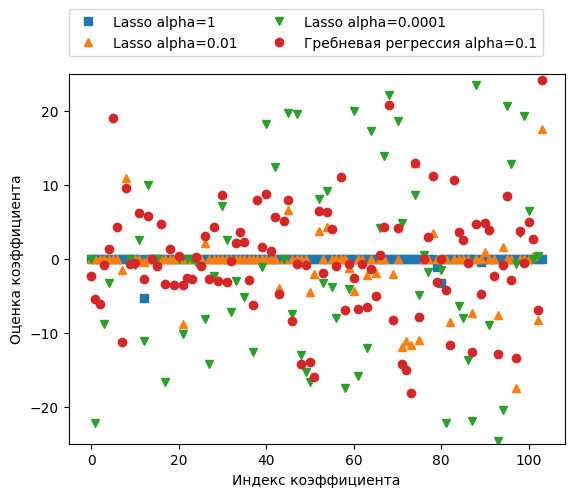

In [67]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")

C:\Users\user\PycharmProjects\BigData\venv\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\PycharmProjects\BigData\venv\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


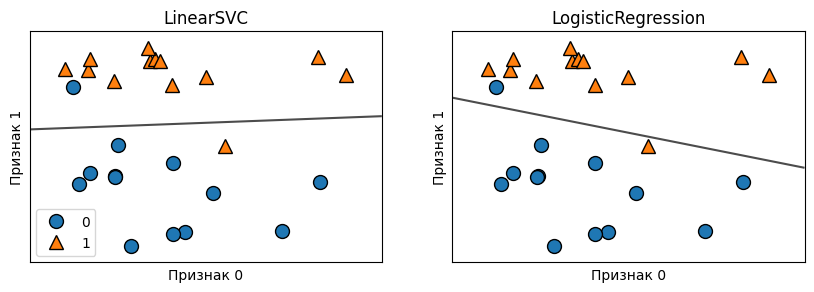

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,
                                    ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
axes[0].legend()

In [70]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)
logreg = LogisticRegression().fit(X_train, y_train)
print("правильность на обучающем наборе:{:.3f}".format(logreg.score(X_train, y_train)))
print("правильность на тестовом наборе:{:.3f}".format(logreg.score(X_test, y_test)))


правильность на обучающем наборе:0.953
правильность на тестовом наборе:0.958


C:\Users\user\PycharmProjects\BigData\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("правильность на обучающем наборе:{:.3f}".format(logreg100.score(X_train, y_train)))
print("правильность на тестовом наборе:{:.3f}".format(logreg100.score(X_test, y_test)))

правильность на обучающем наборе:0.955
правильность на тестовом наборе:0.958


C:\Users\user\PycharmProjects\BigData\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("правильность на обучающем наборе:{:.3f}".format(logreg001.score(X_train, y_train)))
print("правильность на тестовом наборе:{:.3f}".format(logreg001.score(X_test, y_test)))

правильность на обучающем наборе:0.937
правильность на тестовом наборе:0.930


C:\Users\user\PycharmProjects\BigData\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


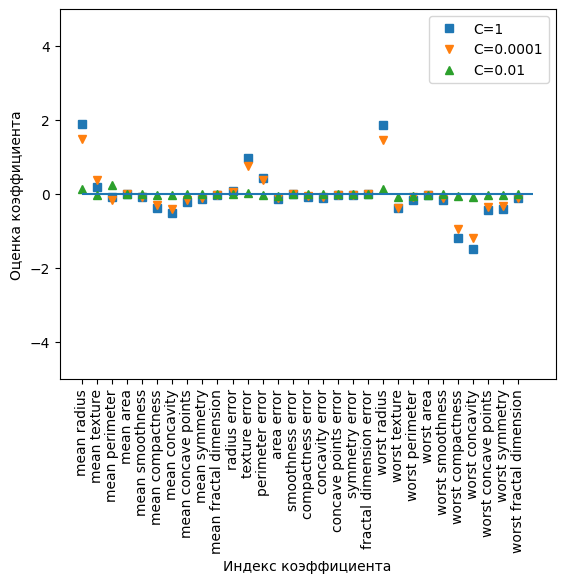

In [74]:
plt.plot(logreg.coef_.T, 's', label="C=1")
plt.plot(logreg100.coef_.T, 'v', label="C=0.0001")
plt.plot(logreg001.coef_.T, '^', label="C=0.01")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()